In [1]:

import pandas as pd
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv




--2024-05-21 04:31:24--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.05s   

2024-05-21 04:31:25 (7.36 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-05-21 04:31:25--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

In [3]:
train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

names = ["class", "message"]

train_file = pd.read_csv(train_file_path, sep='\t', names=names)
train_file

test_file = pd.read_csv(test_file_path, sep='\t', names=names)
test_file



,class,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [4]:
train_message = train_file["message"].values.tolist()
train_label = np.array([0 if x=="ham" else 1 for x in train_file['class'].values.tolist()])
test_message = test_file["message"].values.tolist()
test_label = np.array([0 if x=="ham" else 1 for x in test_file['class'].values.tolist()])



In [5]:
vocabulary_dict = {}
for message in train_message:
  for vocabulary in message.split():
    if vocabulary not in vocabulary_dict:
      vocabulary_dict[vocabulary] = 1
    else:
      vocabulary_dict[vocabulary] += 1

VOCAB_SIZE = len(vocabulary_dict)
MAX_LENGTH = len(max(train_message, key=lambda p: len(p.split())).split())



In [6]:
encoded_train_message = [one_hot(d, VOCAB_SIZE) for d in train_message]
padded_train_message = pad_sequences(encoded_train_message, maxlen=MAX_LENGTH, padding='post')
encoded_test_message = [one_hot(d, VOCAB_SIZE) for d in test_message]
padded_test_message = pad_sequences(encoded_test_message, maxlen=MAX_LENGTH, padding='post')



In [7]:
model = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 100, input_length=MAX_LENGTH)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
monitor = EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=25, verbose=1, mode='max', restore_best_weights=True)
model.fit(padded_train_message, train_label, validation_data=(padded_test_message, test_label), callbacks=[monitor], epochs=1000, verbose=2)



Epoch 1/1000
131/131 - 3s - loss: 0.2356 - acc: 0.9115 - val_loss: 0.0943 - val_acc: 0.9741 - 3s/epoch - 26ms/step
Epoch 2/1000
131/131 - 3s - loss: 0.0541 - acc: 0.9859 - val_loss: 0.0576 - val_acc: 0.9799 - 3s/epoch - 24ms/step
Epoch 3/1000
131/131 - 4s - loss: 0.0264 - acc: 0.9923 - val_loss: 0.0458 - val_acc: 0.9864 - 4s/epoch - 34ms/step
Epoch 4/1000
131/131 - 4s - loss: 0.0145 - acc: 0.9964 - val_loss: 0.0431 - val_acc: 0.9885 - 4s/epoch - 30ms/step
Epoch 5/1000
131/131 - 5s - loss: 0.0085 - acc: 0.9988 - val_loss: 0.0392 - val_acc: 0.9871 - 5s/epoch - 37ms/step
Epoch 6/1000
131/131 - 5s - loss: 0.0052 - acc: 0.9995 - val_loss: 0.0387 - val_acc: 0.9885 - 5s/epoch - 42ms/step
Epoch 7/1000
131/131 - 4s - loss: 0.0037 - acc: 0.9998 - val_loss: 0.0384 - val_acc: 0.9885 - 4s/epoch - 33ms/step
Epoch 8/1000
131/131 - 4s - loss: 0.0029 - acc: 0.9998 - val_loss: 0.0416 - val_acc: 0.9864 - 4s/epoch - 29ms/step
Epoch 9/1000
131/131 - 3s - loss: 0.0022 - acc: 0.9998 - val_loss: 0.0429 - val_

In [8]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  class_dict = {
      0 : "ham",
      1 : "spam",
      }
  encoded_message = [one_hot(pred_text, VOCAB_SIZE)]
  padded_message = pad_sequences(encoded_message, maxlen=MAX_LENGTH, padding='post')
  prediction = [model.predict(padded_message)[0][0], class_dict[np.round(model.predict(padded_message)[0][0])]]
  return prediction

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

# Function to visualize predictions


1/1 [==============================] - 0s 22ms/step
[0.003051992, 'ham']


1/1 [==============================] - 0s 34ms/step


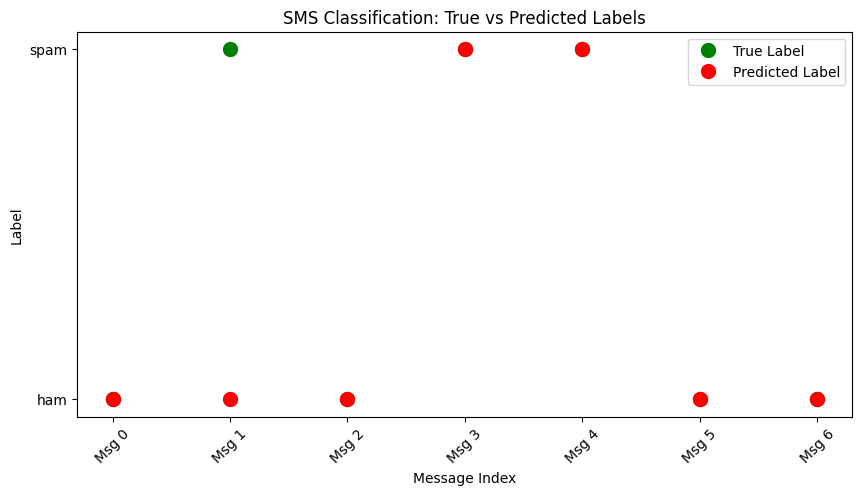

In [16]:
# Function to visualize predictions
def visualize_predictions():
    test_messages = ["how are you doing today",
                     "sale today! to stop texts call 98912460324",
                     "i dont want to go. can we try it a different day? available sat",
                     "our new mobile video service is live. just install on your phone to start watching.",
                     "you have won £1000 cash! call to claim your prize.",
                     "i'll bring it tomorrow. don't forget the milk.",
                     "wow, is your arm alright. that happened to me one time too"
                    ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]

    predictions = [predict_message(msg)[1] for msg in test_messages]

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(test_answers)), test_answers, 'go', label='True Label', markersize=10)
    plt.plot(range(len(predictions)), predictions, 'ro', label='Predicted Label', markersize=10)
    plt.xlabel('Message Index')
    plt.ylabel('Label')
    plt.title('SMS Classification: True vs Predicted Labels')
    plt.xticks(range(len(test_messages)), ['Msg {}'.format(i) for i in range(len(test_messages))], rotation=45)
    plt.legend(loc='upper right')
    plt.show()

visualize_predictions()